In [11]:
import gymnasium as gym
import copy

In [12]:
from algorithms import plot_average_reward, compare_learning_rewards
from algorithms import OptionsQLearning, SMDPQLearning, IOQLearning

from options import Option

### The Environment

In [5]:
env = gym.make('Taxi-v3', render_mode="rgb_array")

### Learning the option policies, with well defined order of executions 

We will learn the option policies from this experiment and use them in the HRL learning

In [6]:
options = {ind: Option(env, loc) for ind, loc in enumerate(env.unwrapped.locs)}
options_q_learning = OptionsQLearning(env, options)
options_q_learning.train()

  0%|                                                                                                                 | 0/1500 [00:00<?, ?it/s]/Users/arjunramesh/.local/share/virtualenvs/RL_2024_PA_3-5EEPQmDE/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:01<00:00, 1336.42it/s]


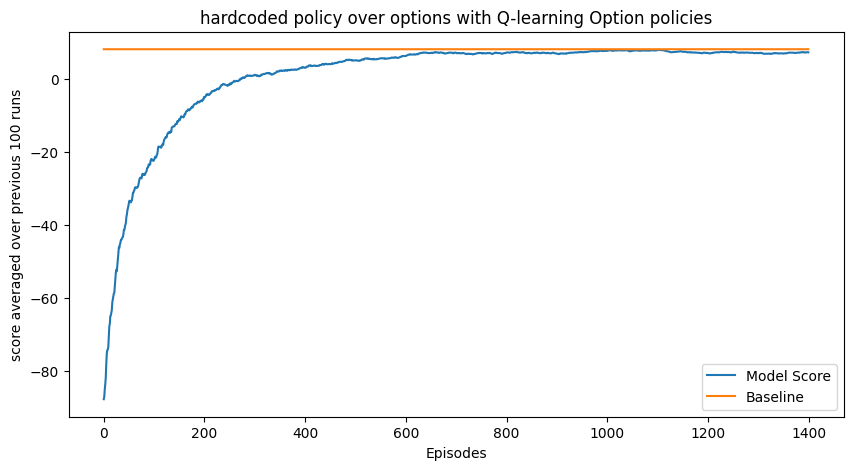

In [7]:
plot_average_reward(options_q_learning.rewards_history, title='hardcoded policy over options with Q-learning Option policies', baseline=8)

### Using the learned options policy to train an SMDP model

In [9]:
# For this variant, I've decided to focus on learning in such a manner that will return best total reward
# and to make things computationally simple, I've decided to ignore the taxi's current state as part of the
# SMDP state space and focus just the passenger pick-up and drop-off locations.
# The expectation is to still learn the abstraction, which passenger to pick and drop first, without 
# explicitly considering the taxi position 

smdp_options = copy.deepcopy(options)
smdp_q_learning = SMDPQLearning(
    env = env,
    options = smdp_options,
    q_values_state_count = 5 * 4, # to indicate the possible passenger_loc and drop_loc
    q_values_action_count = 4 # to accomodate the 4 options
)
smdp_q_learning.train()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:01<00:00, 1470.96it/s]


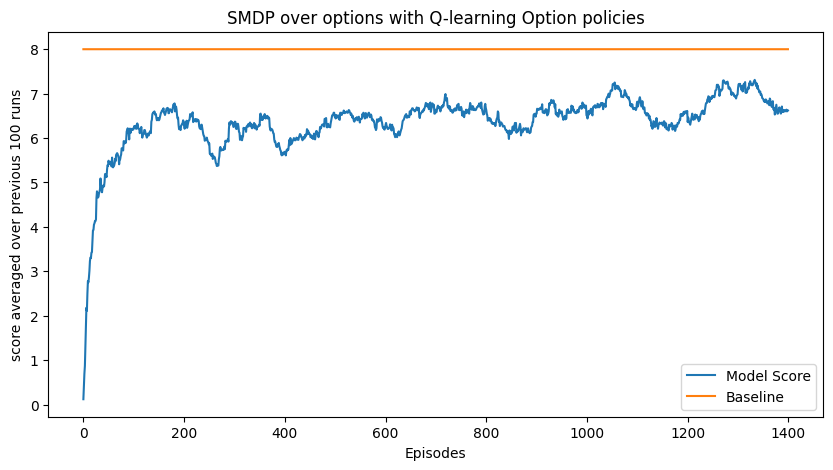

In [10]:
plot_average_reward(smdp_q_learning.rewards_history, title='SMDP over options with Q-learning Option policies', baseline=8)

### Using the learned options policy to train an IOQL model

In [13]:
ioql_options = copy.deepcopy(options)
io_q_learning = IOQLearning(
    env = env,
    options = ioql_options,
    q_values_state_count = 5 * 4, # to indicate the possible passenger_loc and drop_loc
    q_values_action_count = 4 # to accomodate the 4 options
)
io_q_learning.train()

  0%|                                                                                                                 | 0/1500 [00:00<?, ?it/s]/Users/arjunramesh/.local/share/virtualenvs/RL_2024_PA_3-5EEPQmDE/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:02<00:00, 532.41it/s]


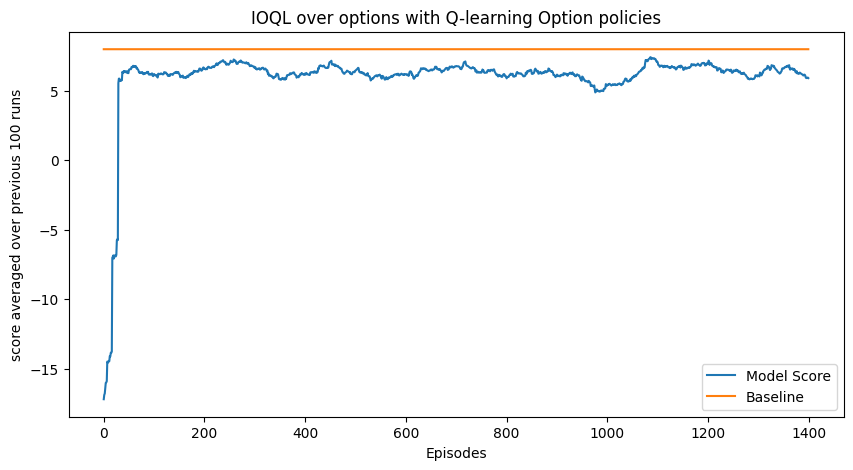

In [14]:
plot_average_reward(io_q_learning.rewards_history, title='IOQL over options with Q-learning Option policies', baseline=8)

## Comparing the different Algorithms

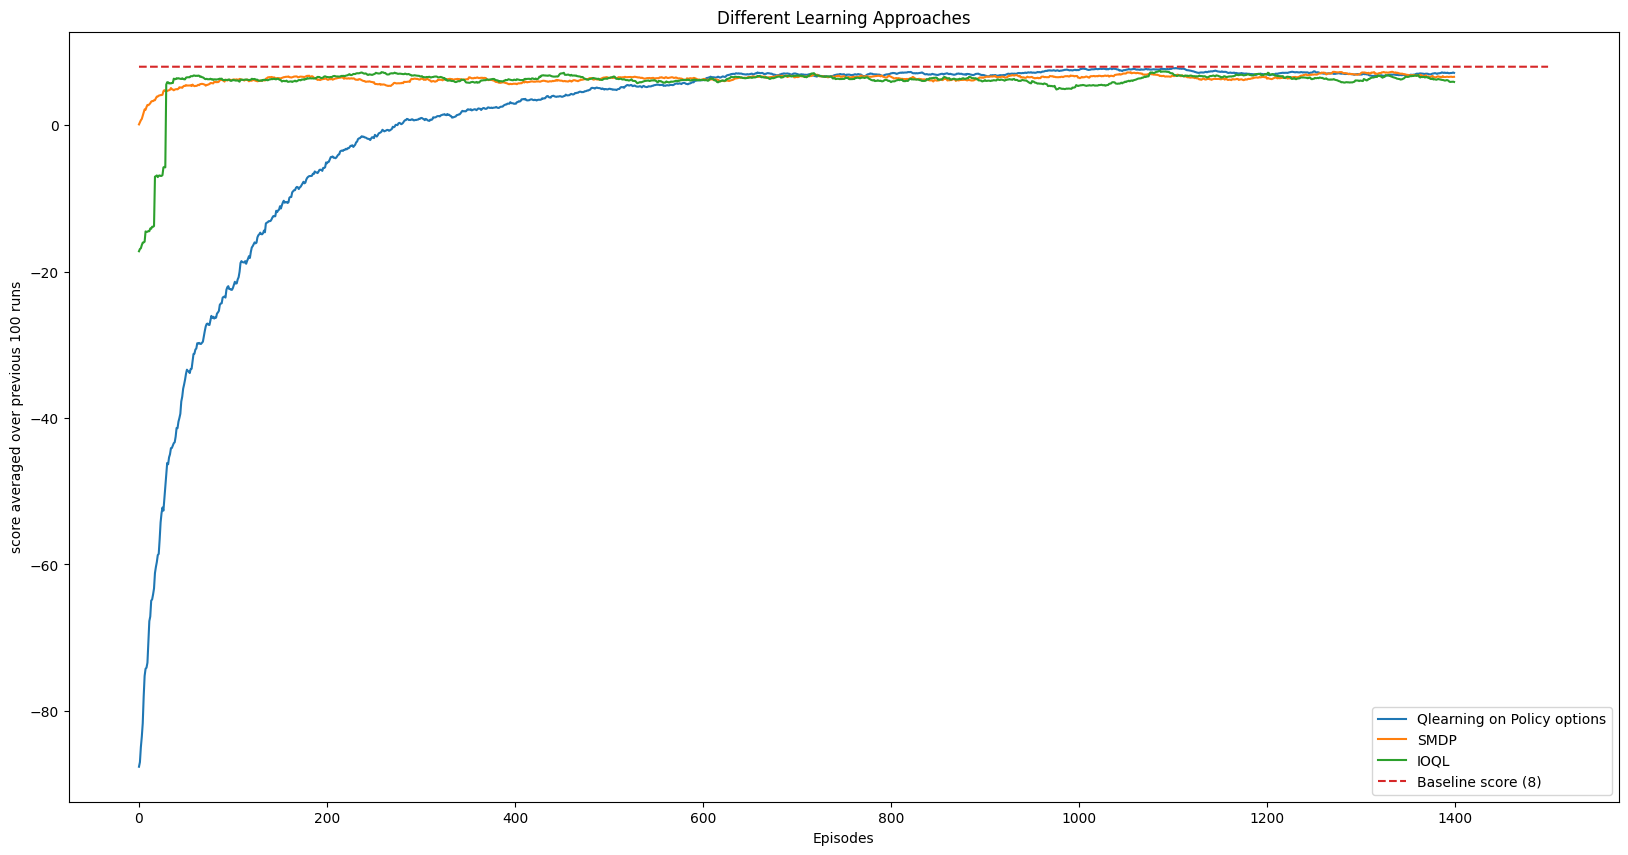

In [16]:
rewards_history_list = [
    (options_q_learning.rewards_history, 'Qlearning on Policy options'),
    (smdp_q_learning.rewards_history, 'SMDP'),
    (io_q_learning.rewards_history, 'IOQL')
]

compare_learning_rewards(rewards_history_list, title='Different Learning Approaches', baseline=8)